<a href="https://colab.research.google.com/github/vamshi9868/Airline-delay-prediction/blob/main/EDA_project_air_line_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why this project?
I'm sure that my project airlines delay predictions have proper data to analyse.


## Which domain it belongs to?
It comes under business domain.
## Information about dataset?
The Data is about Airlines dataset to predict a delay dataset has 539383 instances and 8 different features. The task is to predict whether a given flight will be delayed, given the information of the scheduled departure.it contain infotmation about 
id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay etc.



## What is your approach?
The purpose of the project is predicting flight delays that occur due to bad weather conditions.
Perform data preparation and cleaning using pandas and numpy,perform exploratory analysis and visualization using matplotlib and seaborn,Ask and answer questions about the data in jupyter notebok,summarize my infrences and write a conclusion


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/EDA project/Airlines.csv")

In [4]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
df.shape

(539383, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [7]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [8]:
df.isnull()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
539378,False,False,False,False,False,False,False,False,False
539379,False,False,False,False,False,False,False,False,False
539380,False,False,False,False,False,False,False,False,False
539381,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
a = df['Flight'].unique()
print(len(a))

6585


### DATA VISUALISATION

### 6585 unique aircrafts are used in our dataset
## Checking the airlines with the most and least delay

In [12]:
different_delay_name=df["Delay"].unique()
different_delay_name

array([1, 0])

In [13]:
count_of_delay=df["Delay"].value_counts(sort=True)
count_of_delay

0    299119
1    240264
Name: Delay, dtype: int64

In [14]:
from plotly import offline
from plotly import graph_objs as go
values=count_of_delay.values
labels=count_of_delay.index
trace0=go.Pie(labels=labels,values=values,hole=0.4,textinfo="label+percent")
layout=dict(title="Flight Delay Status.",title_x=0.5)
data=[trace0]
fig=dict(data=data,layout=layout)
offline.iplot(fig)

In [15]:
df.groupby(["Airline","Flight"]).agg(max_time=("Time","max"),min_time=("Time","min"),total_time=("Time","sum"),average_Time=("Time","mean")).reset_index()

,Airline,Flight,max_time,min_time,total_time,average_Time
0,9E,3650,1165,410,19261,875.500000
1,9E,3651,982,455,21244,786.814815
2,9E,3652,937,595,25399,769.666667
3,9E,3653,992,530,24506,742.606061
4,9E,3654,1160,950,58870,1070.363636
...,...,...,...,...,...,...
18165,YV,7305,1025,367,26300,730.555556
18166,YV,7306,1185,407,33205,721.847826
18167,YV,7307,1190,708,42123,877.562500
18168,YV,7308,1164,496,43426,986.954545


In [16]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

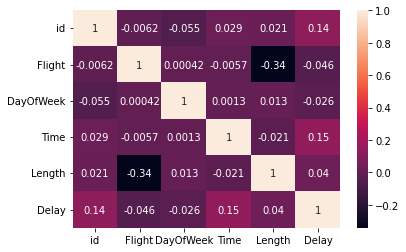

In [17]:
sns.heatmap(df.corr(),annot= True)

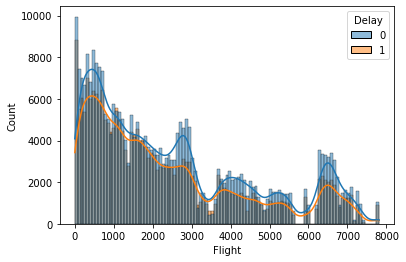

In [18]:
sns.histplot(data=df, x='Flight', hue='Delay', kde=True)

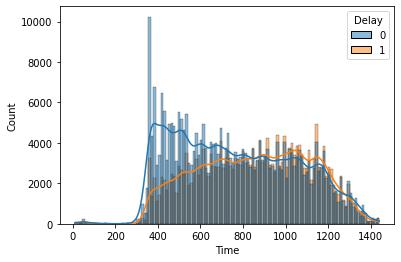

In [19]:
sns.histplot(data=df, x='Time', hue='Delay', kde=True)

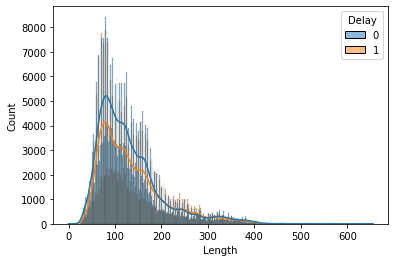

In [20]:
sns.histplot(data=df, x='Length', hue='Delay', kde=True)

# CATEGORICAL DATA VISUALIZATION AND DATA CLEANING


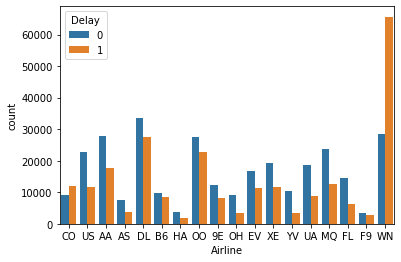

In [21]:
sns.countplot(data=df, x='Airline', hue='Delay')

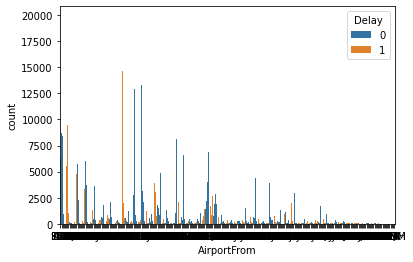

In [22]:
sns.countplot(data=df, x='AirportFrom', hue='Delay')

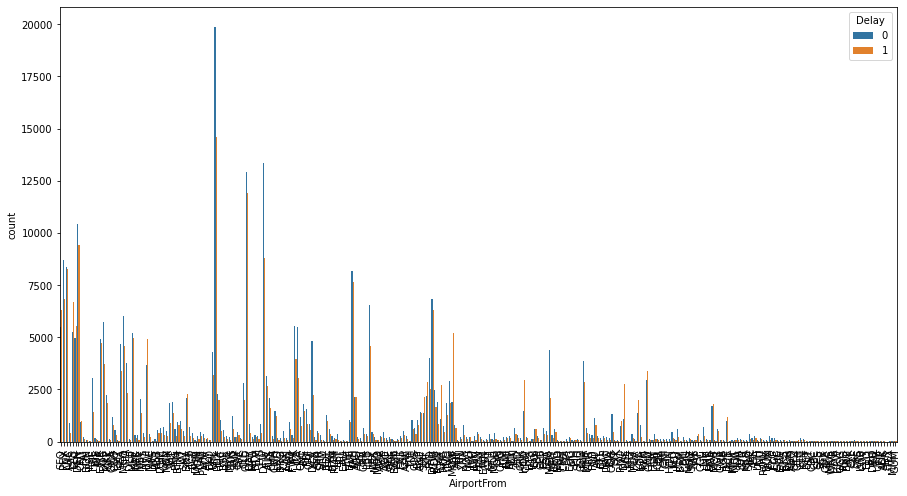

In [23]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom', hue='Delay')
plt.xticks(rotation=90)
plt.show()

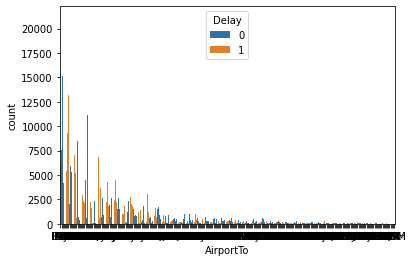

In [24]:
sns.countplot(data=df, x='AirportTo', hue='Delay')

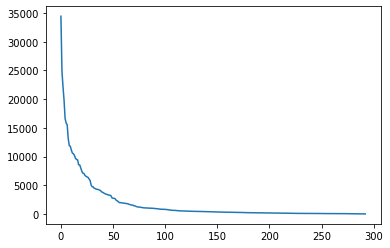

In [25]:
airto = df['AirportTo'].value_counts()
plt.plot(range(len(airto)), airto)

In [26]:
df['AirportTo'] = df['AirportTo'].apply(lambda s: s if str(s) in airto[:50] else 'others')

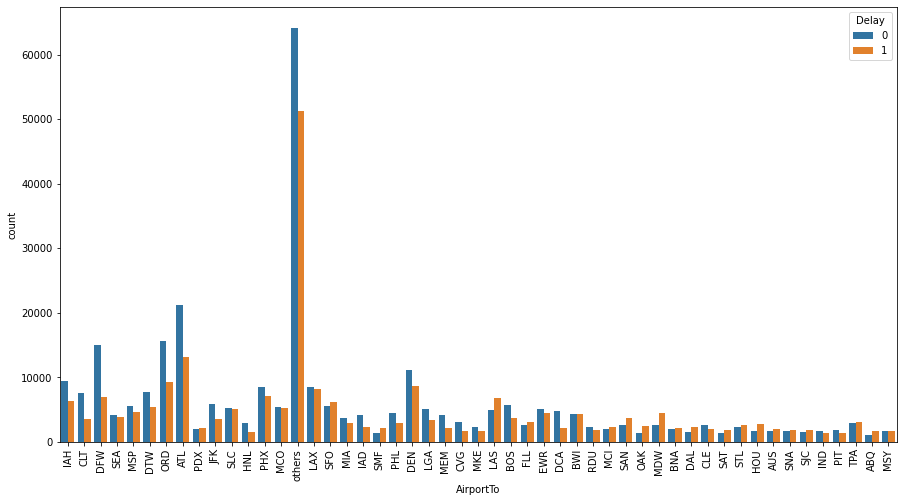

In [27]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportTo', hue='Delay')
plt.xticks(rotation=90)
plt.show()

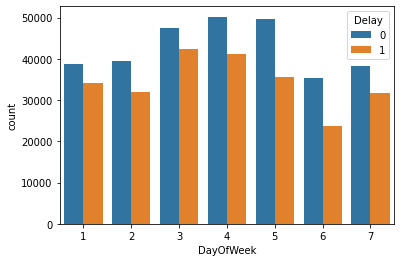

In [28]:
sns.countplot(data=df, x='DayOfWeek', hue='Delay')

# DATA PREPROCESSING


In [29]:
X_cat = df[['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
X_num = df.drop(['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay'], axis=1)

In [30]:
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,...,AirportTo_SAT,AirportTo_SEA,AirportTo_SFO,AirportTo_SJC,AirportTo_SLC,AirportTo_SMF,AirportTo_SNA,AirportTo_STL,AirportTo_TPA,AirportTo_others
0,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
539379,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539380,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539381,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Delay']
X.head()

,id,Flight,Time,Length,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportTo_SAT,AirportTo_SEA,AirportTo_SFO,AirportTo_SJC,AirportTo_SLC,AirportTo_SMF,AirportTo_SNA,AirportTo_STL,AirportTo_TPA,AirportTo_others
0,-1.732048,-1.044258,-2.833092,1.038237,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.732041,-0.420778,-2.833092,1.280689,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.732035,-0.013509,-2.815110,0.467761,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.732028,0.018415,-2.815110,0.895618,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.732022,-1.122133,-2.779144,0.995451,3,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
X.isna().sum()

id                  0
Flight              0
Time                0
Length              0
DayOfWeek           0
                   ..
AirportTo_SMF       0
AirportTo_SNA       0
AirportTo_STL       0
AirportTo_TPA       0
AirportTo_others    0
Length: 364, dtype: int64

# **Data** **Analysis**

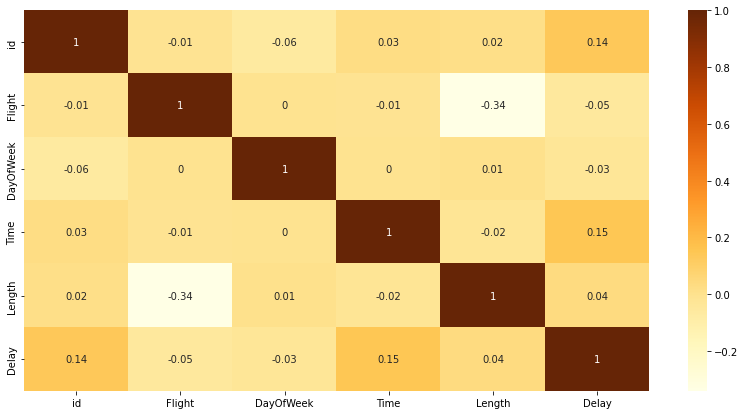

In [34]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

# **"Categorical Variables"**
Airline: We can see that we have some airlines that fly much more than others, we can see that we have 18 Airlines in our database.

DayOfWeek: We don't have a big difference between the days, but is interesting to see that Wednesday and Thursday are the days that we have more fly.

Delay: Its interesting to see that our database has almost the same value in our variable target.

AirportFrom/AirportTo: here we can see which airports receive or make flights the most, we can see that we have 293 airports.

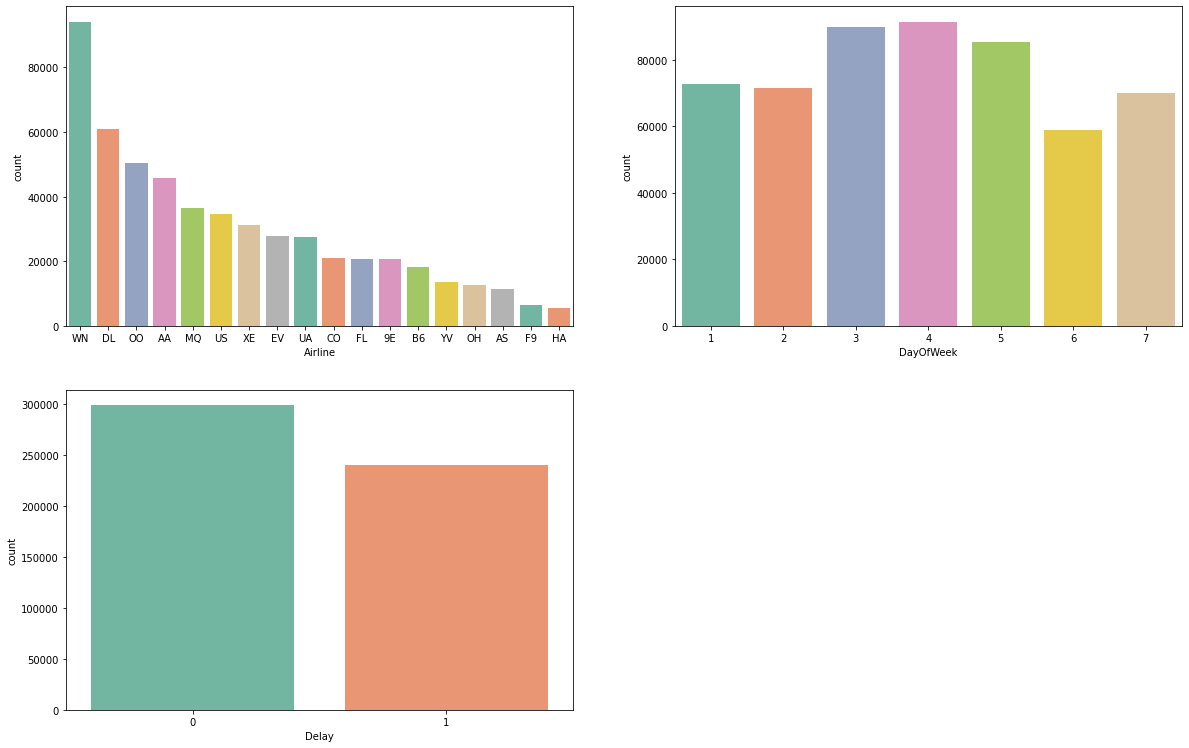

In [35]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Airline', palette='Set2', data = df, order = df['Airline'].value_counts().index)

plt.subplot(3,2,2)
sns.countplot(x = 'DayOfWeek', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Delay', palette='Set2', data = df)

In [36]:
import plotly.express as px
dt_AirportFrom = df[['AirportFrom','id']].groupby('AirportFrom').agg('count').reset_index()
dt_AirportFrom = dt_AirportFrom.sort_values('id', ascending=False)
fig = px.bar(dt_AirportFrom.head(20), x='AirportFrom', y='id', )
fig.show()

In [37]:
dt_AirportTo = df[['AirportTo','id']].groupby('AirportTo').agg('count').reset_index()
dt_AirportTo = dt_AirportTo.sort_values('id', ascending=False)
fig = px.bar(dt_AirportTo.head(20), x='AirportTo', y='id', )
fig.show()

In [38]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [39]:
len(df['Airline'].unique())

18

In [40]:
df['AirportFrom'].value_counts()

ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [41]:
len(df['AirportFrom'].unique())

293

In [42]:
df['AirportTo'].value_counts()

others    115457
ATL        34440
ORD        24871
DFW        22153
DEN        19848
LAX        16656
IAH        15819
PHX        15558
DTW        13146
LAS        11918
SFO        11792
CLT        11132
MCO        10605
SLC        10486
MSP        10181
EWR         9670
JFK         9490
BOS         9429
BWI         8557
LGA         8549
SEA         8042
PHL         7478
MDW         7102
DCA         7068
MIA         6720
IAD         6565
MEM         6450
SAN         6372
TPA         6086
FLL         5812
STL         5034
CLE         4730
CVG         4713
HNL         4453
HOU         4419
BNA         4300
PDX         4274
MCI         4250
RDU         4147
MKE         4070
DAL         3835
OAK         3781
AUS         3655
SNA         3535
SMF         3473
MSY         3401
SJC         3357
PIT         3270
SAT         3267
IND         3167
ABQ         2800
Name: AirportTo, dtype: int64

In [43]:
len(df['AirportTo'].unique())

51

In [44]:
df['DayOfWeek'].value_counts()

4    91445
3    89746
5    85248
1    72769
2    71340
7    69879
6    58956
Name: DayOfWeek, dtype: int64

In [45]:
df['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

## **"Continuous Variables"**
Time: We can see that the Flights has a good distribuition for time, we don't have a predominance Length: We can see that the length of the Flights usually is between 100-200 but the most part is around 150.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



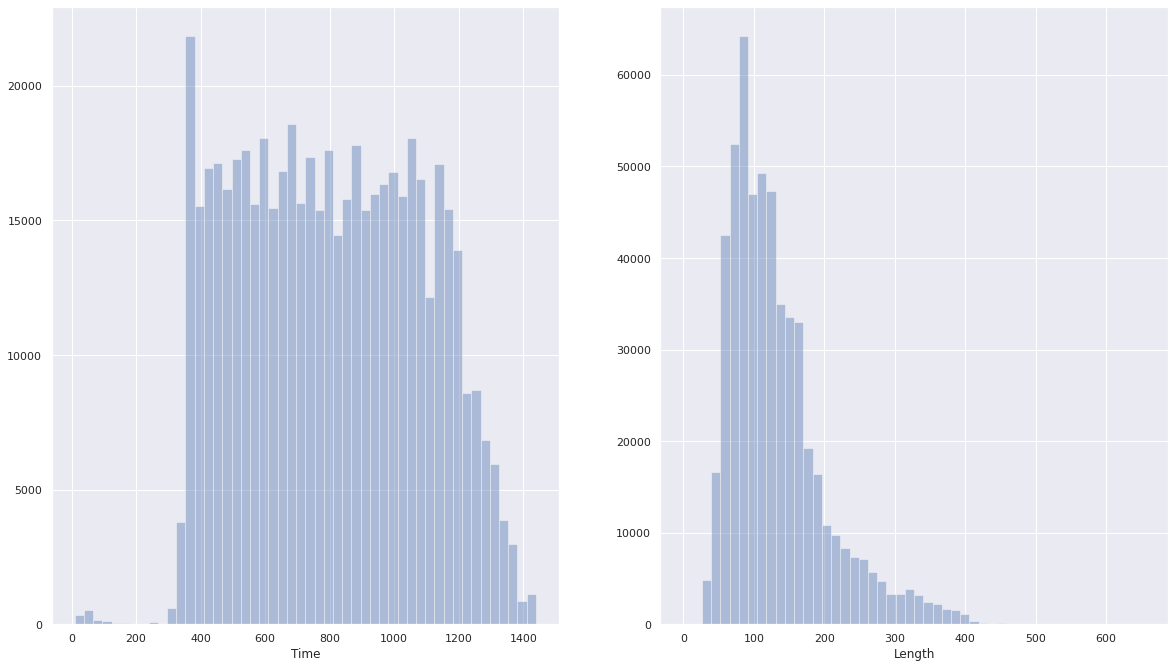

In [46]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.distplot(df.Time, kde = False)

plt.subplot(2,2,2)
sns.distplot(df.Length, kde = False)

## **Bivariate Analysis**
When we compare our variable target with others categorical variables, we can see some insights: When we see our Variable Airline, we can see that we have some Airlines that has more delay than anothers, like WN, if you catch a fly from WN, probably your flight will be delayed, an interesting point is when we see the variable "DayOfWeek", we can see that we don't have much difference between the days, when we see the continuous variables we don't have a pattern.

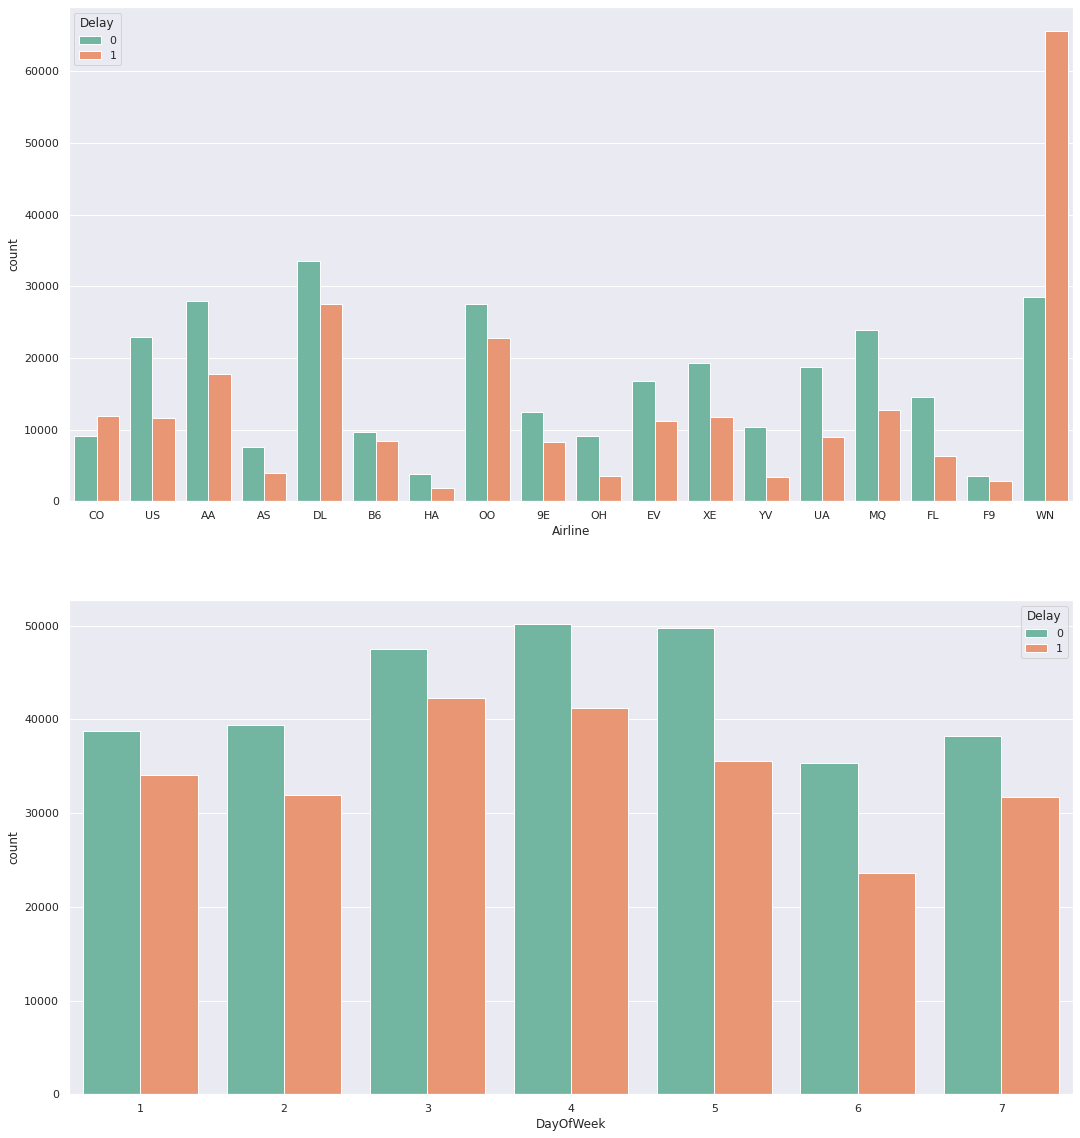

In [47]:
plt.figure(figsize = (18,20))

plt.subplot(2,1,1)
sns.countplot(x = 'Airline', hue= 'Delay', palette='Set2', data = df)

plt.subplot(2,1,2)
sns.countplot(x = 'DayOfWeek', hue= 'Delay', palette='Set2', data = df)

In [48]:
import plotly.express as px
df_delay = df[df['Delay'] == 1]
dt_AirportFrom = df_delay[['AirportFrom','Delay']].groupby('AirportFrom').agg('count').reset_index()
dt_AirportFrom = dt_AirportFrom.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportFrom.head(20), x='AirportFrom', y='Delay')
fig.show()

In [49]:
df_dont_delay = df[df['Delay'] == 0]
dt_AirportFrom = df_dont_delay[['AirportFrom','Delay']].groupby('AirportFrom').agg('count').reset_index()
dt_AirportFrom = dt_AirportFrom.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportFrom.head(20), x='AirportFrom', y='Delay')
fig.show()

In [50]:
dt_AirportTo = df_delay[['AirportTo','Delay']].groupby('AirportTo').agg('count').reset_index()
dt_AirportTo = dt_AirportTo.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportTo.head(20), x='AirportTo', y='Delay')
fig.show()

In [51]:
dt_AirportTo = df_dont_delay[['AirportTo','Delay']].groupby('AirportTo').agg('count').reset_index()
dt_AirportTo = dt_AirportTo.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportTo.head(20), x='AirportTo', y='Delay')
fig.show()

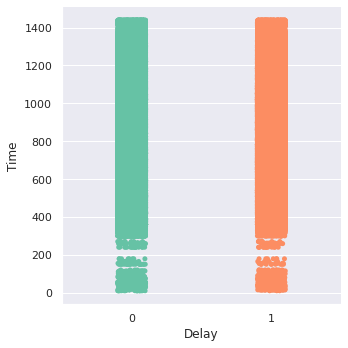

In [52]:
sns.catplot(x = "Delay", y = "Time", palette = "Set2", data = df)

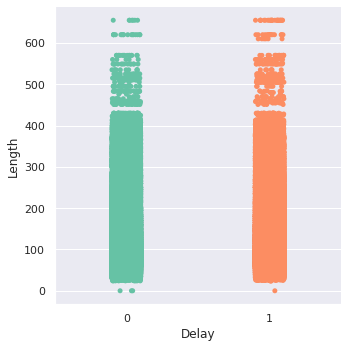

In [53]:
sns.catplot(x = "Delay", y = "Length", palette = "Set2", data = df)

## **Statistical** **Analysis**

In [54]:
df["AirportFrom"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0         SFO
1         PHX
2         LAX
3         SFO
4         ANC
         ... 
539378    OGG
539379    SEA
539380    SFO
539381    HNL
539382    LAX
Name: AirportFrom, Length: 539383, dtype: object>

In [55]:
df["AirportTo"].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0         IAH
1         CLT
2         DFW
3         DFW
4         SEA
         ... 
539378    SNA
539379    ATL
539380    MKE
539381    SFO
539382    PHL
Name: AirportTo, Length: 539383, dtype: object>

In [56]:
df["DayOfWeek"].mode

<bound method Series.mode of 0         3
1         3
2         3
3         3
4         3
         ..
539378    5
539379    5
539380    5
539381    5
539382    5
Name: DayOfWeek, Length: 539383, dtype: int64>

In [57]:
df["Length"].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 0         205
1         222
2         165
3         195
4         202
         ... 
539378    326
539379    305
539380    255
539381    313
539382    301
Name: Length, Length: 539383, dtype: int64>

In [58]:
from sklearn.impute import SimpleImputer

## **Mean** **from** **sklearn**

In [61]:
impo = SimpleImputer(strategy='mean')
x = df[["Time"]]
x = impo.fit_transform(x)
print(x)

[[  15.]
 [  15.]
 [  20.]
 ...
 [1439.]
 [1439.]
 [1439.]]


### **Median from sklearn**

In [62]:
impo = SimpleImputer(strategy='median')
x = df[["Length"]]
x = impo.fit_transform(x)
print(x)

[[205.]
 [222.]
 [165.]
 ...
 [255.]
 [313.]
 [301.]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



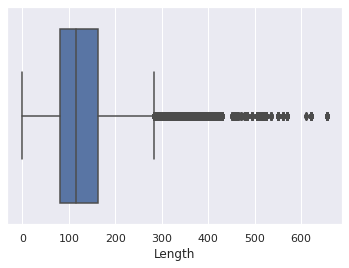

In [63]:
sns.boxplot(df["Length"])

## **Multivariate Analysis**

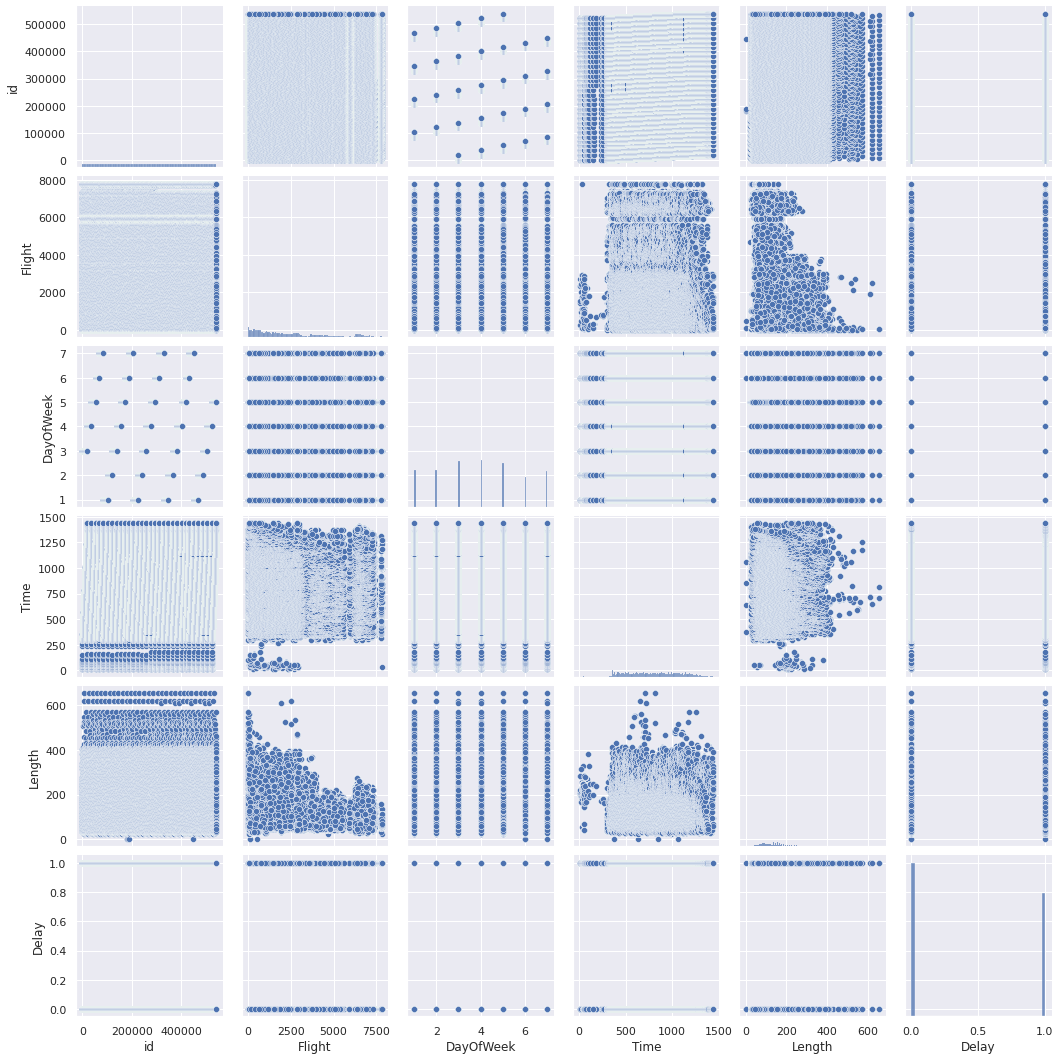

In [64]:
sns.pairplot(df)